In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.groupby('sex')[['total_bill']].mean()

/tmp/ipython-input-2388094044.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')[['total_bill']].mean()


,total_bill
sex,
Male,20.744076
Female,18.056897


In [5]:
df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()

/tmp/ipython-input-884363850.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()


total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [6]:
df.pivot_table(index='sex',columns='smoker',values='total_bill')

/tmp/ipython-input-1243499625.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill')


smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [7]:
# aggfunc
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='std')

/tmp/ipython-input-1799809698.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='std')


smoker,Yes,No
sex,,
Male,9.911845,8.726566
Female,9.189751,7.286455


In [10]:
# all cols t
df.pivot_table(index='sex', columns='smoker', values='size', aggfunc='count')


/tmp/ipython-input-587118447.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex', columns='smoker', values='size', aggfunc='count')


smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [11]:
# multidimensional
df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean','tip':'max','total_bill':'sum'},margins=True)

/tmp/ipython-input-3049374134.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean','tip':'max','total_bill':'sum'},margins=True)


size                                                 \
day                Thur              Fri                 Sat       Sun   
time              Lunch Dinner     Lunch    Dinner    Dinner    Dinner   
sex    smoker                                                            
Male   Yes     2.300000    NaN  1.666667  2.400000  2.629630  2.600000   
       No      2.500000    NaN       NaN  2.000000  2.656250  2.883721   
Female Yes     2.428571    NaN  2.000000  2.000000  2.200000  2.500000   
       No      2.500000    2.0  3.000000  2.000000  2.307692  3.071429   
All            2.459016    2.0  2.000000  2.166667  2.517241  2.842105   

                          tip               ...       total_bill         \
day                 All  Thur          Fri  ...   All       Thur          
time                    Lunch Dinner Lunch  ...            Lunch Dinner   
sex    smoker                               ...                           
Male   Yes     2.500000  5.00    NaN  2.20  ...  10.0     191.71   0.00   
       No      2.711340  6.70    NaN   NaN  ...   9.0     369.73   0.00   
Female Yes     2.242424  5.00    NaN  3.48  ...   6.5     134.53   0.00   
       No      2.592593  5.17    3.0  3.00  ...   5.2     381.58  18.78   
All            2.569672  6.70    3.0  3.48  ...  10.0    1077.55  18.78   

                                                                     
day              Fri           Sat            Sun               All  
time           Lunch  Dinner Lunch   Dinner Lunch   Dinner           
sex    smoker                                                        
Male   Yes     34.16  129.46   0.0   589.62   0.0   392.12  1337.07  
       No       0.00   34.95   0.0   637.73   0.0   877.34  1919.75  
Female Yes     39.78   48.80   0.0   304.00   0.0    66.16   593.27  
       No      15.98   22.75   0.0   247.05   0.0   291.54   977.68  
All            89.92  235.96   NaN  1778.40   NaN  1627.16  4827.77  

[5 rows x 23 columns]

In [12]:
# margins
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum',margins=True)

/tmp/ipython-input-1561592577.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum',margins=True)


smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [13]:
# plotting graphs
df = pd.read_csv('/content/expense_data.csv')

In [14]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [15]:
df['Category'].value_counts()

,count
Category,
Food,156
Other,60
Transportation,31
Apparel,7
Household,6
Allowance,6
Social Life,5
Education,1
Salary,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [17]:
df['Date'] = pd.to_datetime(df['Date'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [19]:
df['month'] = df['Date'].dt.month_name()

In [20]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March


<Axes: xlabel='month'>

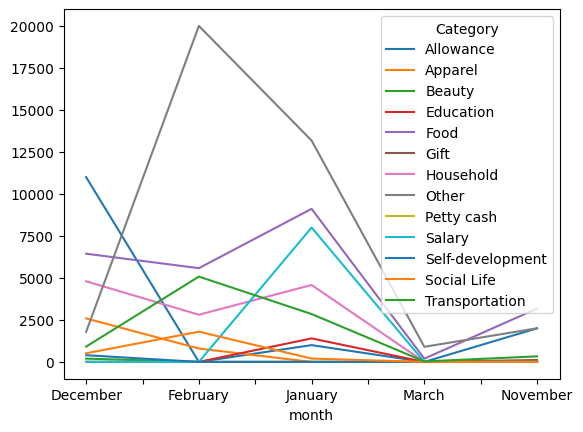

In [21]:
df.pivot_table(index='month',columns='Category',values='INR',aggfunc='sum',fill_value=0).plot()

<Axes: xlabel='month'>

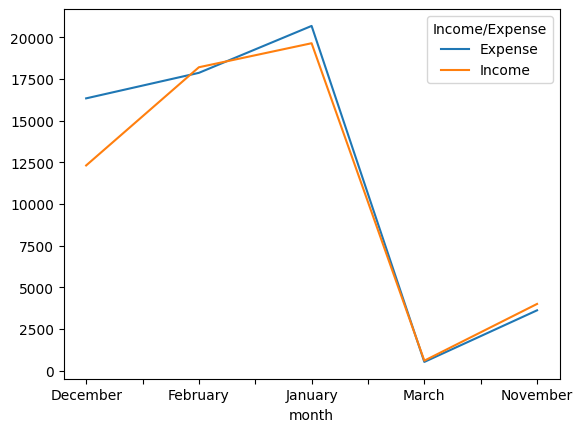

In [22]:
df.pivot_table(index='month',columns='Income/Expense',values='INR',aggfunc='sum',fill_value=0).plot()

<Axes: xlabel='month'>

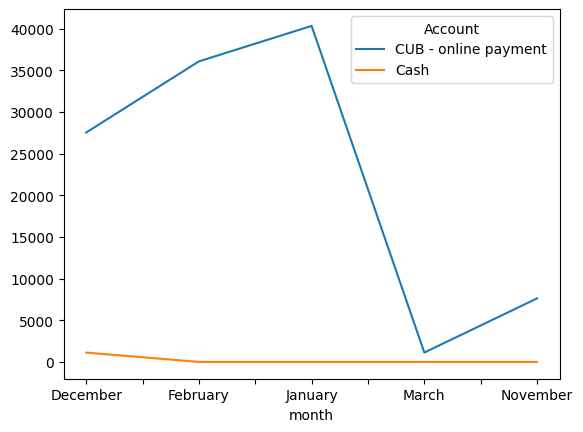

In [23]:
df.pivot_table(index='month',columns='Account',values='INR',aggfunc='sum',fill_value=0).plot()

**String**

In [24]:
# What are vectorized operations
a = np.array([1,2,3,4])
a * 4

array([ 4,  8, 12, 16])

In [25]:
# How pandas solves this issue?

s = pd.Series(['cat','mat',None,'rat'])
# string accessor
s.str.startswith('c')

# fast and optimized

,0
0,True
1,False
2,None
3,False


In [26]:
df=pd.read_csv('/content/titanic.csv')
df['Name']

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [27]:
# Common Functions
# lower/upper/capitalize/title
df['Name'].str.upper()
df['Name'].str.capitalize()
df['Name'].str.title()
# len
df['Name'][df['Name'].str.len() == 82].values[0]
# strip
"                   nitish                              ".strip()
df['Name'].str.strip()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [28]:
from pickle import HIGHEST_PROTOCOL
# split -> get

df['lastname']=df['Name'].str.split(',').str.get(0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


In [29]:
df[['title','firstname']] = df['Name'].str.split(',').str.get(1).str.strip().str.split(' ', n=1, expand=True)
df.head()

df['title'].value_counts()

,count
title,
Mr.,517
Miss.,182
Mrs.,125
Master.,40
Dr.,7
Rev.,6
Col.,2
Mlle.,2
Major.,2


In [30]:
# replace
df['title'] = df['title'].str.replace('Ms.','Miss.')
df['title'] = df['title'].str.replace('Mlle.','Miss.')


In [31]:
df['title'].value_counts()

,count
title,
Mr.,517
Miss.,185
Mrs.,125
Master.,40
Dr.,7
Rev.,6
Major.,2
Col.,2
Don.,1


In [32]:
# filtering
# startswith/endswith
df[df['firstname'].str.endswith('A')]
# isdigit/isalpha...
df[df['firstname'].str.isdigit()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname


In [33]:
# applying regex
# contains
# search john -> both case
df[df['firstname'].str.contains('john',case=False)]
# find lastnames with start and end char vowel
df[df['lastname'].str.contains('^[^aeiouAEIOU].+[^aeiouAEIOU]$')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr.,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs.,John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss.,Laina
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Moran,Mr.,James
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr.,Timothy J
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,Sutehall,Mr.,Henry Jr
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,Miss.,Margaret Edith
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,Miss.,"Catherine Helen ""Carrie"""
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr,Mr.,Karl Howell


In [34]:
#slicing
df['Name'].str[::-1]

,Name
0,"sirraH newO .rM ,dnuarB"
1,")reyahT sggirB ecnerolF( yeldarB nhoJ .srM ,sg..."
2,"aniaL .ssiM ,nenikkieH"
3,")leeP yaM yliL( htaeH seuqcaJ .srM ,ellertuF"
4,"yrneH mailliW .rM ,nellA"
...,...
886,"sazouJ .veR ,alivtnoM"
887,"htidE teragraM .ssiM ,maharG"
888,"""eirraC"" neleH enirehtaC .ssiM ,notsnhoJ"
889,"llewoH lraK .rM ,rheB"


**Timestamp object**

In [36]:
# creating a timestamp
type(pd.Timestamp('2025/1/5'))

pandas._libs.tslibs.timestamps.Timestamp

In [37]:
# variations
pd.Timestamp('2025-1-5')
pd.Timestamp('2025, 1, 5')

Timestamp('2025-01-05 00:00:00')

In [38]:
pd.Timestamp('2025')

Timestamp('2025-01-01 00:00:00')

In [39]:
pd.Timestamp('14th August 2025')

Timestamp('2025-08-14 00:00:00')

In [40]:
#providing time also

pd.Timestamp('5th august 2025 9:21AM')
# pd.Timestamp('2023/1/5/9/21') give error sowe import a library for time

Timestamp('2023-01-05 09:21:00')

In [41]:

# using datetime.datetime object
import datetime as dt

x = pd.Timestamp(dt.datetime(2023,1,5,9,21,56))
x

Timestamp('2023-01-05 09:21:56')

In [42]:
# fetching attributes
x.year
x.month
x.day
x.hour
x.minute
x.second

56

In [43]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [44]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

**datetimeindex object**

In [46]:
# from strings
type(pd.DatetimeIndex(['2025/8/1','2024/1/1','2023/1/1']))

pandas.core.indexes.datetimes.DatetimeIndex

In [47]:
# using python datetime object
pd.DatetimeIndex([dt.datetime(2023,1,1),dt.datetime(2022,1,1),dt.datetime(2021,1,1)])

DatetimeIndex(['2023-01-01', '2022-01-01', '2021-01-01'], dtype='datetime64[ns]', freq=None)

In [48]:
# using pd.timestamps
dt_index = pd.DatetimeIndex([pd.Timestamp(2023,1,1),pd.Timestamp(2022,1,1),pd.Timestamp(2021,1,1)])

In [49]:
# using datatimeindex as series index

pd.Series([1,2,3],index=dt_index)

,0
2023-01-01,1
2022-01-01,2
2021-01-01,3


**date_range func**

In [50]:
# using datatimeindex as series index

pd.Series([1,2,3],index=dt_index)

,0
2023-01-01,1
2022-01-01,2
2021-01-01,3


In [51]:
# generate daily dates in a given range
pd.date_range(start='2023/1/5',end='2023/2/28',freq='3D')

DatetimeIndex(['2023-01-05', '2023-01-08', '2023-01-11', '2023-01-14',
               '2023-01-17', '2023-01-20', '2023-01-23', '2023-01-26',
               '2023-01-29', '2023-02-01', '2023-02-04', '2023-02-07',
               '2023-02-10', '2023-02-13', '2023-02-16', '2023-02-19',
               '2023-02-22', '2023-02-25', '2023-02-28'],
              dtype='datetime64[ns]', freq='3D')

In [52]:
# alternate days in a given range
pd.date_range(start='2023/1/5',end='2023/2/28',freq='3D')

DatetimeIndex(['2023-01-05', '2023-01-08', '2023-01-11', '2023-01-14',
               '2023-01-17', '2023-01-20', '2023-01-23', '2023-01-26',
               '2023-01-29', '2023-02-01', '2023-02-04', '2023-02-07',
               '2023-02-10', '2023-02-13', '2023-02-16', '2023-02-19',
               '2023-02-22', '2023-02-25', '2023-02-28'],
              dtype='datetime64[ns]', freq='3D')

In [53]:
# B -> business days
pd.date_range(start='2023/1/5',end='2023/2/28',freq='B')

DatetimeIndex(['2023-01-05', '2023-01-06', '2023-01-09', '2023-01-10',
               '2023-01-11', '2023-01-12', '2023-01-13', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-23', '2023-01-24', '2023-01-25', '2023-01-26',
               '2023-01-27', '2023-01-30', '2023-01-31', '2023-02-01',
               '2023-02-02', '2023-02-03', '2023-02-06', '2023-02-07',
               '2023-02-08', '2023-02-09', '2023-02-10', '2023-02-13',
               '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17',
               '2023-02-20', '2023-02-21', '2023-02-22', '2023-02-23',
               '2023-02-24', '2023-02-27', '2023-02-28'],
              dtype='datetime64[ns]', freq='B')

In [54]:
# W -> one week per day
pd.date_range(start='2023/1/5',end='2023/2/28',freq='W-THU')

DatetimeIndex(['2023-01-05', '2023-01-12', '2023-01-19', '2023-01-26',
               '2023-02-02', '2023-02-09', '2023-02-16', '2023-02-23'],
              dtype='datetime64[ns]', freq='W-THU')

In [55]:
# H -> Hourly data(factor)
pd.date_range(start='2023/1/5',end='2023/2/28',freq='6H')

/tmp/ipython-input-987353597.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range(start='2023/1/5',end='2023/2/28',freq='6H')


DatetimeIndex(['2023-01-05 00:00:00', '2023-01-05 06:00:00',
               '2023-01-05 12:00:00', '2023-01-05 18:00:00',
               '2023-01-06 00:00:00', '2023-01-06 06:00:00',
               '2023-01-06 12:00:00', '2023-01-06 18:00:00',
               '2023-01-07 00:00:00', '2023-01-07 06:00:00',
               ...
               '2023-02-25 18:00:00', '2023-02-26 00:00:00',
               '2023-02-26 06:00:00', '2023-02-26 12:00:00',
               '2023-02-26 18:00:00', '2023-02-27 00:00:00',
               '2023-02-27 06:00:00', '2023-02-27 12:00:00',
               '2023-02-27 18:00:00', '2023-02-28 00:00:00'],
              dtype='datetime64[ns]', length=217, freq='6h')

In [56]:
# M -> Month end
pd.date_range(start='2023/1/5',end='2023/2/28',freq='M')

/tmp/ipython-input-1126803610.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range(start='2023/1/5',end='2023/2/28',freq='M')


DatetimeIndex(['2023-01-31', '2023-02-28'], dtype='datetime64[ns]', freq='ME')

In [57]:
# MS -> Month start
pd.date_range(start='2023/1/5',end='2023/2/28',freq='MS')

DatetimeIndex(['2023-02-01'], dtype='datetime64[ns]', freq='MS')

In [58]:
# A -> Year end
pd.date_range(start='2023/1/5',end='2030/2/28',freq='A')

/tmp/ipython-input-2121269259.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  pd.date_range(start='2023/1/5',end='2030/2/28',freq='A')


DatetimeIndex(['2023-12-31', '2024-12-31', '2025-12-31', '2026-12-31',
               '2027-12-31', '2028-12-31', '2029-12-31'],
              dtype='datetime64[ns]', freq='YE-DEC')

In [59]:
# using periods(number of results)
pd.date_range(start='2023/1/5',periods=25,freq='M')

/tmp/ipython-input-1478210292.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range(start='2023/1/5',periods=25,freq='M')


DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
               '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
               '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31',
               '2025-01-31'],
              dtype='datetime64[ns]', freq='ME')

In [60]:
# simple series example

s = pd.Series(['2023/1/1','2022/1/1','2021/1/1'])
pd.to_datetime(s).dt.day_name()

,0
0,Sunday
1,Saturday
2,Friday


In [61]:
# with errors
s = pd.Series(['2023/1/1','2022/1/1','2021/130/1'])
pd.to_datetime(s,errors='coerce').dt.month_name()

,0
0,January
1,January
2,NaN


In [62]:
df = pd.read_csv('/content/expense_data.csv')
df.shape

(277, 11)

In [63]:
df['Date'] = pd.to_datetime(df['Date'])

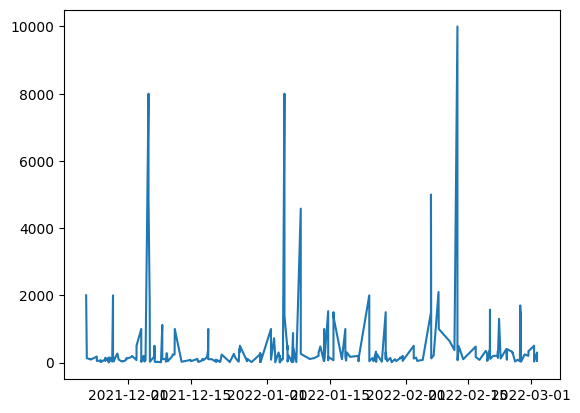

In [64]:
# plot graph
import matplotlib.pyplot as plt
plt.plot(df['Date'],df['INR'])

In [65]:
# day name wise bar chart/month wise bar chart

df['day_name'] = df['Date'].dt.day_name()

In [66]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,Wednesday
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,Wednesday
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,Tuesday
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,Tuesday
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,Tuesday


<Axes: xlabel='day_name'>

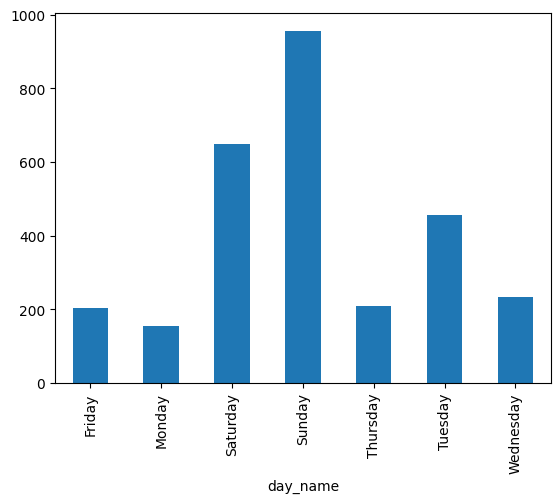

In [67]:
df.groupby('day_name')['INR'].mean().plot(kind='bar')

In [68]:
df['month_name'] = df['Date'].dt.month_name()

In [69]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name,month_name
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,Wednesday,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,Wednesday,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,Tuesday,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,Tuesday,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,Tuesday,March


<Axes: xlabel='day_name'>

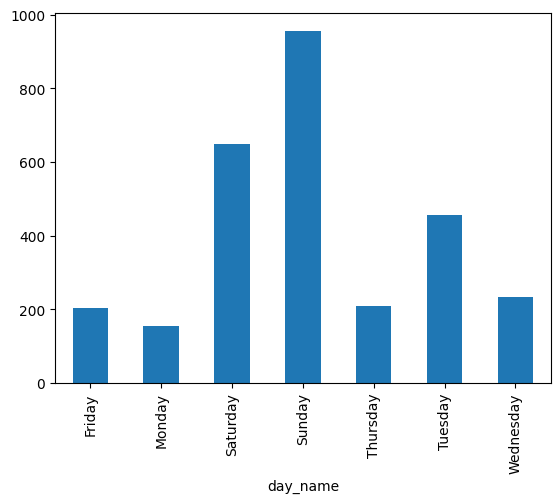

In [70]:
df.groupby('day_name')['INR'].mean().plot(kind='bar')

In [ ]:
df['month_name'] = df['Date'].dt.month_name()

In [71]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name,month_name
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,Wednesday,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,Wednesday,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,Tuesday,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,Tuesday,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,Tuesday,March


In [72]:
df[df['Date'].dt.is_month_end]

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name,month_name
7,2022-02-28 11:56:00,CUB - online payment,Food,NaN,Pizza,339.15,Expense,NaN,339.15,INR,339.15,Monday,February
8,2022-02-28 11:45:00,CUB - online payment,Other,NaN,From kumara,200.00,Income,NaN,200.00,INR,200.00,Monday,February
61,2022-01-31 08:44:00,CUB - online payment,Transportation,NaN,Vnr to apk,50.00,Expense,NaN,50.00,INR,50.00,Monday,January
62,2022-01-31 08:27:00,CUB - online payment,Other,NaN,To vicky,200.00,Expense,NaN,200.00,INR,200.00,Monday,January
63,2022-01-31 08:26:00,CUB - online payment,Transportation,NaN,To ksr station,153.00,Expense,NaN,153.00,INR,153.00,Monday,January
242,2021-11-30 14:24:00,CUB - online payment,Gift,NaN,Bharath birthday,115.00,Expense,NaN,115.00,INR,115.00,Tuesday,November
243,2021-11-30 14:17:00,CUB - online payment,Food,NaN,Lunch with company,128.00,Expense,NaN,128.00,INR,128.00,Tuesday,November
244,2021-11-30 10:11:00,CUB - online payment,Food,NaN,Breakfast,70.00,Expense,NaN,70.00,INR,70.00,Tuesday,November


<Axes: xlabel='month_name'>

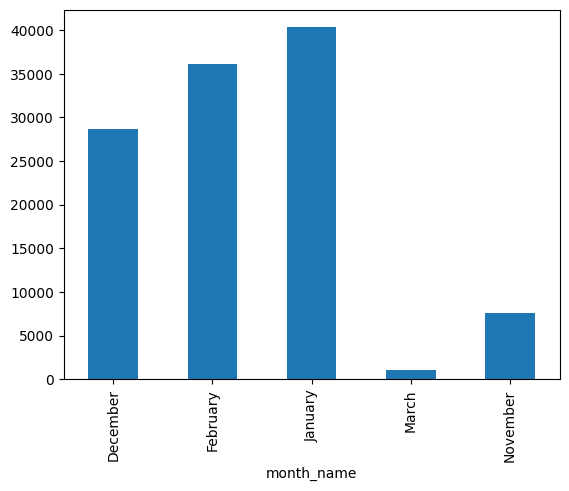

In [73]:

df.groupby('month_name')['INR'].sum().plot(kind='bar')